In [1]:
#calling the libraries
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from subprocess import check_output

In [13]:
#Calling the datasets
books= pd.read_csv('books.csv')
ratings = pd.read_csv('ratings.csv')
book_tags = pd.read_csv('book_tags.csv')
tags = pd.read_csv('tags.csv')
to_read = pd.read_csv('to_read.csv')

## Exploratory Analysis

### Cleaning Data
#### Finding NaN values in the dataset:

In [24]:
NaN_books = books.isnull().sum().sum()
NaN_ratings = ratings.isnull().sum().sum()
NaN_book_tags = book_tags.isnull().sum().sum()
NaN_tags = tags.isnull().sum().sum()
NaN_to_read = to_read.isnull().sum().sum()


print("For Books dataset it we have:", NaN_books, "NaN \n" 
      "For Ratings dataset it we have:", NaN_ratings, "NaN\n"
      "For Book Tags dataset it we have:", NaN_book_tags, "NaN\n"
      "For Tags dataset it we have:", NaN_tags , "NaN\n"
      "For To Read dataset it we have:", NaN_to_read , "NaN")

For Books dataset it we have: 0 NaN 
For Ratings dataset it we have: 0 NaN
For Book Tags dataset it we have: 0 NaN
For Tags dataset it we have: 0 NaN
For To Read dataset it we have: 0 NaN


#### Removing NaN from Books DataSet:

In [25]:
books = books.dropna()
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


#### Changing Year from floating to integer:

In [26]:
print ("Orginal_publication_year type is: ", books['original_publication_year'].dtype)
books['original_publication_year']=books.original_publication_year.astype(int)
books

Orginal_publication_year type is:  int64


,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
6,7,5907,5907,1540236,969,618260307,9.780618e+12,J.R.R. Tolkien,1937,The Hobbit or There and Back Again,...,2071616,2196809,37653,46023,76784,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...
7,8,5107,5107,3036731,360,316769177,9.780317e+12,J.D. Salinger,1951,The Catcher in the Rye,...,2044241,2120637,44920,109383,185520,455042,661516,709176,https://images.gr-assets.com/books/1398034300m...,https://images.gr-assets.com/books/1398034300s...
8,9,960,960,3338963,311,1416524797,9.781417e+12,Dan Brown,2000,Angels & Demons,...,2001311,2078754,25112,77841,145740,458429,716569,680175,https://images.gr-assets.com/books/1303390735m...,https://images.gr-assets.com/books/1303390735s...
9,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813,Pride and Prejudice,...,2035490,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...


### What is the distribution of ratings?

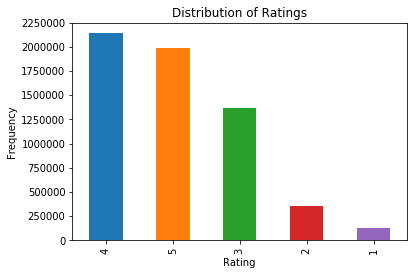

In [27]:
df_disrat= ratings['rating'].value_counts().plot.bar()
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### Rating per books
###### Most of the books have 248 reviews on average, and some of the books have few as 8 reviews.

In [28]:
ratingperbook = ratings.groupby('book_id').book_id.apply(lambda x: len(x))
ratingperbook.describe()

count    10000.000000
mean       597.647900
std       1267.289788
min          8.000000
25%        155.000000
50%        248.000000
75%        503.000000
max      22806.000000
Name: book_id, dtype: float64

### Rating per users:
##### Most of the users have at least 19 reviews.

In [29]:
ratingperuser = ratings.groupby('user_id').user_id.apply(lambda x: len(x))
ratingperuser.describe()

count    53424.000000
mean       111.868804
std         26.071224
min         19.000000
25%         96.000000
50%        111.000000
75%        128.000000
max        200.000000
Name: user_id, dtype: float64

### Genres

In [30]:
#Adding genres 
genres = ['romance','fiction','young-adult','fantasy','science-fiction',
'children','best','covers','non-fiction', 'history','mystery',
'paranormal','love','horror','historical','sci-fi',
'historical-fiction','nonfiction','series','literature',  'contemporary',
'thriller','women','novels','suspense','classics' ,'graphic-novels', 
'historical-romance', 'christian']

def search_tags(tag, genres):
    for genre in genres:
        if tag.find(genre) > -1:
            return genre
    return(0)

main_tags = pd.merge(book_tags, tags, on='tag_id')
main_tags['genre'] = main_tags['tag_name'].apply(lambda x: search_tags(x, genres))
main_tags

,goodreads_book_id,tag_id,count,tag_name,genre
0,1,30574,167697,to-read,0
1,2,30574,24549,to-read,0
2,3,30574,496107,to-read,0
3,5,30574,11909,to-read,0
4,6,30574,298,to-read,0
5,8,30574,2823,to-read,0
6,10,30574,3226,to-read,0
7,11,30574,32303,to-read,0
8,13,30574,75870,to-read,0
9,21,30574,33603,to-read,0


## Business prespective

### How many books and users we have in this dataset?

In [31]:
print ("we have ", len(ratings.user_id.unique()), " users \n")
print ("We have ", len(ratings.book_id.unique()), " books \n")

we have  53424  users 

We have  10000  books 



### What is the top 5 books that had low ratings?

In [32]:
ratingperbook.sort_values().head(5)

book_id
7803     8
9345    11
9486    24
1935    33
9315    36
Name: book_id, dtype: int64

### What is the top 5 highest users that rated the most?

In [33]:
ratingperuser.sort_values(ascending = False).head(10)

user_id
30944    200
12874    200
52036    199
28158    199
12381    199
45554    197
6630     197
9668     196
15604    196
14372    196
Name: user_id, dtype: int64

### World cloud implementation on genre:
#### As you can see the most common genre we have is fiction.

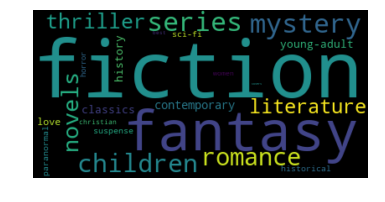

In [34]:
#We removed the zero in order not to show it in the worldcloud
new_main_tags = main_tags[~(main_tags == 0).any(axis=1)]
d= new_main_tags['genre'].value_counts()
d

#installed worldcloud pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(max_font_size=1000)
wordcloud.generate_from_frequencies(d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Top 10 Rated Books:

In [35]:
books_top10rated = books.sort_values('average_rating', ascending = False)
books_top10rated[['original_title', 'authors','average_rating']].head(10)

,original_title,authors,average_rating
3627,The Complete Calvin and Hobbes,Bill Watterson,4.82
861,Words of Radiance,Brandon Sanderson,4.77
8853,Mark of the Lion Trilogy,Francine Rivers,4.76
4482,It's a Magical World: A Calvin and Hobbes Coll...,Bill Watterson,4.75
6360,There's Treasure Everywhere: A Calvin and Hobb...,Bill Watterson,4.74
421,Complete Harry Potter Boxed Set,J.K. Rowling,4.74
6589,The Authoritative Calvin and Hobbes,Bill Watterson,4.73
6919,The Indispensable Calvin and Hobbes: A Calvin ...,Bill Watterson,4.73
3752,"Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,4.73
9565,Attack of the Deranged Mutant Killer Monster S...,Bill Watterson,4.72


### Top 10 Popular Books:

In [36]:
books_top10popular = books.sort_values('ratings_count', ascending = False)
books_top10popular[['original_title', 'authors','ratings_count']].head(10)

,original_title,authors,ratings_count
0,The Hunger Games,Suzanne Collins,4780653
1,Harry Potter and the Philosopher's Stone,"J.K. Rowling, Mary GrandPré",4602479
2,Twilight,Stephenie Meyer,3866839
3,To Kill a Mockingbird,Harper Lee,3198671
4,The Great Gatsby,F. Scott Fitzgerald,2683664
5,The Fault in Our Stars,John Green,2346404
6,The Hobbit or There and Back Again,J.R.R. Tolkien,2071616
7,The Catcher in the Rye,J.D. Salinger,2044241
9,Pride and Prejudice,Jane Austen,2035490
8,Angels & Demons,Dan Brown,2001311


### How many books was created each years?

In [10]:
booksyear = books.groupby("original_publication_year")['book_id'].count().reset_index().sort_values(by='original_publication_year',ascending=False).reset_index(drop=True)
booksyear.columns=['original_publication_year','No_of_release_books']
booksyear


,original_publication_year,No_of_release_books
0,2017,7
1,2016,133
2,2015,201
3,2014,308
4,2013,337
5,2012,361
6,2011,402
7,2010,376
8,2009,379
9,2008,333


Text(0,0.5,'Number of Released BOoks')

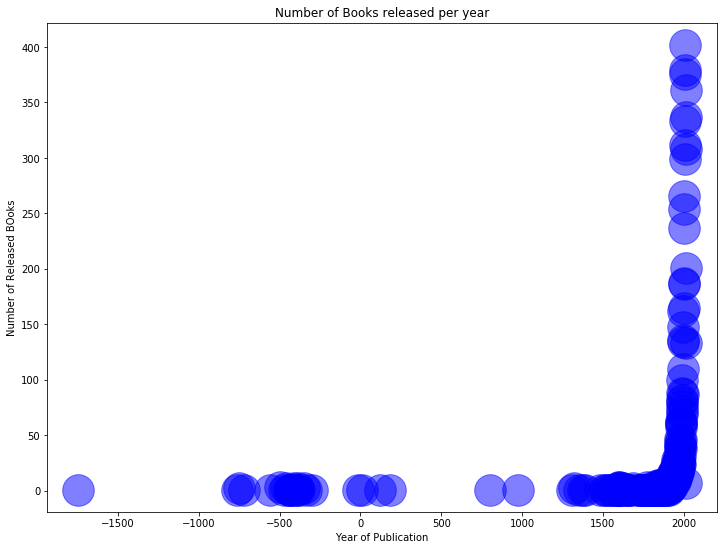

In [20]:
booksyear.plot.scatter(x="original_publication_year",y="No_of_release_books",s=1000,figsize=(12,9),c="blue",alpha=0.5)
plt.title('Number of Books released per year')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Released BOoks')

NameError: name 'year' is not defined